<a href="https://colab.research.google.com/github/JinalShah1809/Image-Colorization/blob/main/Image_Colourization(Landscape).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
path = '/content/Images'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(64, 64), batch_size=2388, class_mode=None)


Found 2388 images belonging to 2 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128 ) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(2388, 64, 64, 1)
(2388, 64, 64, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       2

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=200, batch_size=100)

Epoch 1/200
22/22 [==============================] - 3s 113ms/step - loss: 0.0061 - accuracy: 0.7464 - val_loss: 0.0128 - val_accuracy: 0.6470
Epoch 2/200
22/22 [==============================] - 2s 111ms/step - loss: 0.0060 - accuracy: 0.7507 - val_loss: 0.0138 - val_accuracy: 0.6338
Epoch 3/200
22/22 [==============================] - 2s 111ms/step - loss: 0.0060 - accuracy: 0.7477 - val_loss: 0.0142 - val_accuracy: 0.6410
Epoch 4/200
22/22 [==============================] - 2s 111ms/step - loss: 0.0058 - accuracy: 0.7511 - val_loss: 0.0129 - val_accuracy: 0.6497
Epoch 5/200
22/22 [==============================] - 2s 111ms/step - loss: 0.0060 - accuracy: 0.7498 - val_loss: 0.0133 - val_accuracy: 0.6453
Epoch 6/200
22/22 [==============================] - 2s 112ms/step - loss: 0.0058 - accuracy: 0.7540 - val_loss: 0.0126 - val_accuracy: 0.6396
Epoch 7/200
22/22 [==============================] - 2s 112ms/step - loss: 0.0056 - accuracy: 0.7517 - val_loss: 0.0148 - val_accuracy: 0.6472

In [ ]:
model.save('/content/Model/Colourizer3(Landscape).model')

INFO:tensorflow:Assets written to: /content/Model/Colourizer3(Landscape).model/assets


In [ ]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(64,64))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((64, 64, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()

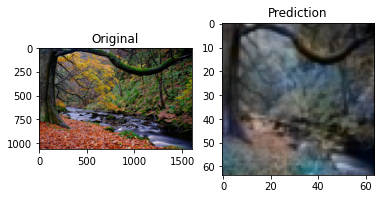

In [ ]:
predict('/content/Test_images/00000295.jpg')

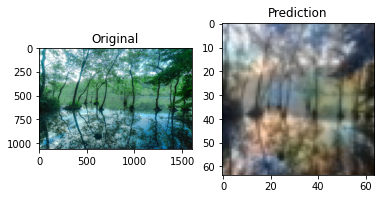

In [ ]:
predict('/content/Test_images/00000019_(6).jpg')

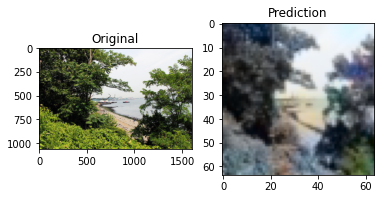

In [ ]:
predict('/content/Test_images/00000234_(5).jpg')

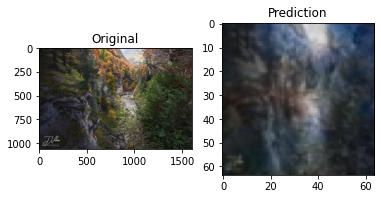

In [ ]:
predict('/content/Test_images/00000766_(2).jpg')

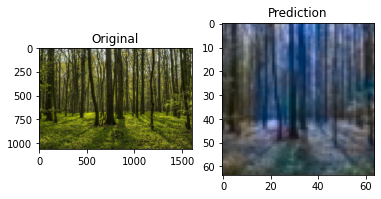

In [ ]:
predict('/content/Test_images/00000846.jpg')

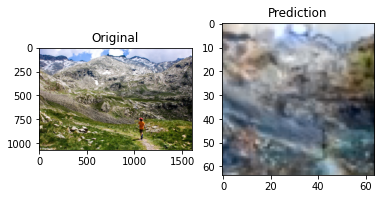

In [ ]:
predict('/content/Test_images/00000327_(3).jpg')

In [ ]:
predict('')